In [1]:
import matplotlib.pyplot as plt
import pickle
import json
import numpy as np

In [2]:
with open('test_policy_dependent_results_2/mean_std_evaluated_policy_20_6_38.json') as f:
    d1 = json.load(f)

In [7]:
with open('test_policy_dependent_results_2/state_error_dict_20_6_38.json') as f:
    d2 = json.load(f)
with open('test_policy_dependent_results_2/reward_error_dict_20_6_38.json') as f:
    d3 = json.load(f)

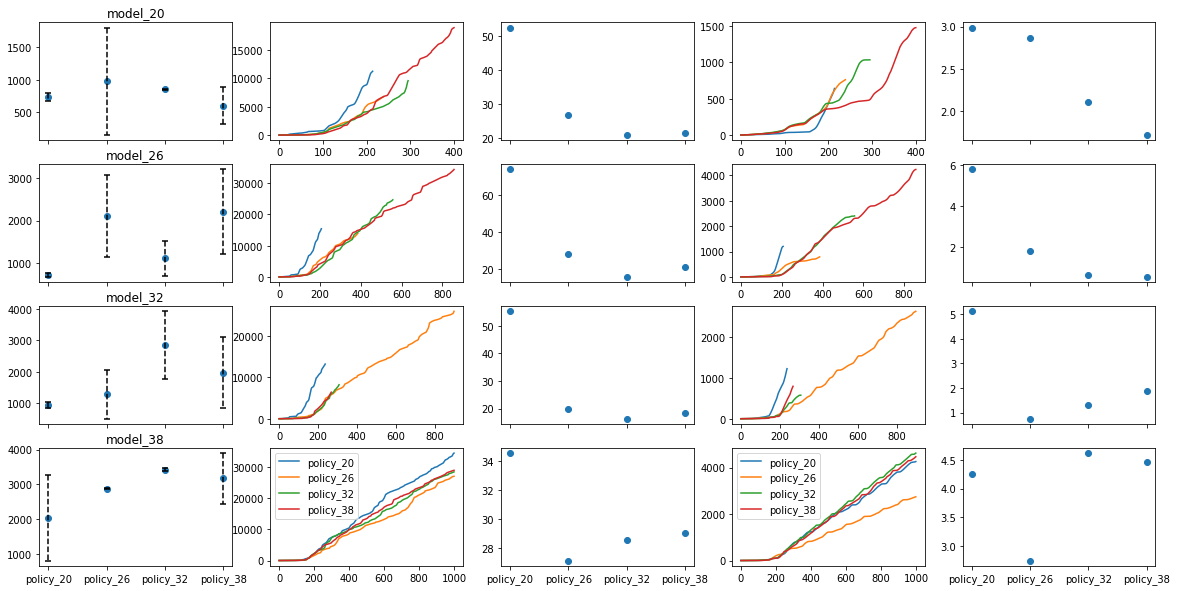

In [11]:
model_list = ['model_{}'.format(i) for i in [20, 26, 32, 38]]
policy_list = ['policy_{}'.format(i) for i in [20, 26, 32, 38]]
fig, ax = plt.subplots(4, 5, figsize=(20, 10))
for i in range(len(model_list)):
    vals = np.array([d1[model_list[i]+'_'+policy_list[j]][0] for j in range(len(policy_list))])
    std = np.array([d1[model_list[i]+'_'+policy_list[j]][1] for j in range(len(policy_list))])
    ax[i, 0].scatter(np.arange(len(model_list)), vals)
    ax[i, 0].scatter(np.arange(len(model_list)), vals+std, color='k', marker='_')
    ax[i, 0].scatter(np.arange(len(policy_list)), vals-std, color='k', marker='_')
    for j in range(len(policy_list)):
        ax[i, 0].plot([j, j], [vals[j]+std[j], vals[j]-std[j]], 'k--')
    ax[i, 0].set_xticks(np.arange(len(policy_list)))
    if i == len(model_list)-1:
        for j in [0, 2, 4]:
            ax[i, j].set_xticks(np.arange(len(policy_list)))
            ax[i, j].set_xticklabels(policy_list)
    else:
        for j in [0, 2, 4]:
            ax[i, j].set_xticks(np.arange(len(policy_list)))
            ax[i, j].set_xticklabels([])
    ax[i, 0].set_title(model_list[i])
    state_errors = [d2[model_list[i]+'_'+policy_list[j]] for j in range(len(policy_list))]
    min_length = np.min([len(state_errors[j]) for j in range(len(policy_list))])
    for j in range(len(policy_list)):
        error = np.cumsum(state_errors[j])
        ax[i, 1].plot(np.arange(len(error)), error, label=policy_list[j])
    if i == len(model_list)-1:
        ax[i, 1].legend()
    mean_state_errors = [np.mean(np.array(state_errors[j][:min_length])) for j in range(len(policy_list))]
    ax[i, 2].scatter(np.arange(len(policy_list)), mean_state_errors)
    reward_errors = [d3[model_list[i]+'_'+policy_list[j]] for j in range(len(policy_list))]
    for j in range(len(policy_list)):
        error = np.cumsum(reward_errors[j])
        ax[i, 3].plot(np.arange(len(error)), error, label=policy_list[j])
    if i == len(model_list)-1:
        ax[i, 3].legend()
    mean_reward_errors = [np.mean(np.array(reward_errors[j][:min_length])) for j in range(len(policy_list))]
    ax[i, 4].scatter(np.arange(len(policy_list)), mean_reward_errors)
fig.savefig('test_policy_dependent_results_2/summary_plot_20_6_38.png')
fig.savefig('test_policy_dependent_results_2/summary_plot_20_6_38.pdf')


In [8]:
np.array(state_errors).shape

(4,)